In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
y = df['label'].values
X = df.drop(columns='label').values

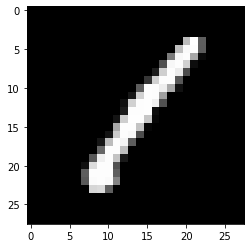

In [4]:
img = X[0]
img.shape = 28, 28
plt.imshow(img, cmap='gray')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()

In [9]:
pca.fit(X_train_sc)

PCA()

In [10]:
pca.explained_variance_ratio_

array([5.84453503e-02, 4.17170702e-02, 3.83427004e-02, 2.97269601e-02,
       2.58371874e-02, 2.24787245e-02, 1.98625232e-02, 1.79523358e-02,
       1.57765598e-02, 1.45161754e-02, 1.37664349e-02, 1.23978374e-02,
       1.15172204e-02, 1.12877578e-02, 1.06466089e-02, 1.01498400e-02,
       9.62348666e-03, 9.51332018e-03, 9.21343205e-03, 9.01403769e-03,
       8.48337727e-03, 8.17840360e-03, 7.87660787e-03, 7.61321019e-03,
       7.33039065e-03, 7.10483608e-03, 6.95505104e-03, 6.70503079e-03,
       6.43066822e-03, 6.22042784e-03, 6.16942083e-03, 6.03580542e-03,
       5.85010468e-03, 5.80095157e-03, 5.70808084e-03, 5.52351556e-03,
       5.43889653e-03, 5.29140833e-03, 5.11568162e-03, 4.90754077e-03,
       4.89204586e-03, 4.83850960e-03, 4.71147429e-03, 4.63436793e-03,
       4.56591938e-03, 4.51413031e-03, 4.46688917e-03, 4.43031163e-03,
       4.33612259e-03, 4.28423148e-03, 4.18246704e-03, 4.08443652e-03,
       4.05732793e-03, 3.98964064e-03, 3.88946904e-03, 3.83631327e-03,
      

# En datos estándar, realizaríamos la reducción sobre valores standarizados.
En estos datos que ya tienen una variación estandar de 0 a 255 y hay zonas con muy poca variación resulta perjudicial y lo haremos sobre los datos sin escalar, pero en la mayoiría de casos lo haremos sobre los datos escalados

In [11]:
pca_2 = PCA(0.95)
pca_2.fit(X_train)
len(pca_2.explained_variance_ratio_)

153

In [12]:
X_train_pca = pca_2.transform(X_train_sc)
X_test_pca = pca_2.transform(X_test_sc)
X_train_pca.shape

(31500, 153)

# Logistic regressor

In [13]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(C=1, max_iter=200, n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, n_jobs=-1)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.9115238095238095

In [35]:
for c in [0.1, 0.5, 1.0, 1.5]:
    lr = LogisticRegression(C=c, max_iter=200, n_jobs=-1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    print(f'C: {c} - Accuracy: {acc}')

C: 0.1 - Accuracy: 0.9088571428571428
C: 0.5 - Accuracy: 0.9128571428571428
C: 1.0 - Accuracy: 0.9115238095238095
C: 1.5 - Accuracy: 0.9127619047619048


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1)
parameters = {'C' : [0.05, 0.1, 0.15]}
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters, scoring = 'accuracy', cv = 3, n_jobs = -1 ,verbose = 2)
grid_scores = grid_search.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [41]:
grid_scores.cv_results_

{'mean_fit_time': array([14.63199051, 14.68379577, 14.48038387]),
 'std_fit_time': array([0.7512291 , 0.327839  , 0.83204079]),
 'mean_score_time': array([0.05336372, 0.05804594, 0.05518381]),
 'std_score_time': array([0.00960868, 0.00831295, 0.01264422]),
 'param_C': masked_array(data=[0.05, 0.1, 0.15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.05}, {'C': 0.1}, {'C': 0.15}],
 'split0_test_score': array([0.90190476, 0.90228571, 0.90095238]),
 'split1_test_score': array([0.90961905, 0.90980952, 0.91028571]),
 'split2_test_score': array([0.90952381, 0.91028571, 0.91066667]),
 'mean_test_score': array([0.90701587, 0.90746032, 0.90730159]),
 'std_test_score': array([0.00361431, 0.00366416, 0.00449226]),
 'rank_test_score': array([3, 1, 2], dtype=int32)}